# Field Projection Example


#### Description: 
A projection is created by integrating and averaging a field value along a given line-of-sight. Projections through large datasets can take quite a while to complete. Here's an example of how blk can be used to save the projection data that yt creates so that it can be quickly and easily recalled and reused.

First, setup blk's cache by giving it a safe place to store a bunch of files. Blk needs you to define a Cache with a path to a specific directory where its ok for blk to save a lot a files. Ideally, this is a directory with a lot of short-term storage like the scratch or nobackup directories on supercomputing clusters.

In [1]:
%load_ext autoreload
%autoreload

In [2]:
%autoreload
from blk import Cache

my_cache = Cache()
my_cache.UI()

Text(value='/mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run/cache', description='blk cache:', layout=…

Button(description='Create cache', icon='check', style=ButtonStyle(), tooltip='Sets the current value of the t…

Cache initialized as : /mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run/cache


Next we create the Tasks that actually do the work of projecting the data and plotting the output. We'll need to create two separate tasks, one dependent on the other, to do this. First lets create the projection task.

In [3]:
%autoreload
from blk import ProjectionTask
proj = ProjectionTask(cache=my_cache)
proj.UI()

Text(value='/mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run', description='Enzo data directory:', lay…

Dropdown(description='Enzo dataset:', index=111, options=('RD0000/RD0000', 'RD0001/RD0001', 'RD0002/RD0002', '…

Dropdown(description='Projection field: ', options=('density', 'temperature', 'metallicity', 'grid_level', 'tc…

BoundedFloatText(value=0.08, description='Box Length:', max=1.0, step=0.001)

Dropdown(description='Shape of region: ', index=1, options=('sphere', 'cube'), value='cube')

GridspecLayout(children=(BoundedFloatText(value=0.486, description='x:', layout=Layout(grid_area='widget001'),…

Button(description='Save and Run', icon='play', style=ButtonStyle(), tooltip='Saves settings and runs the Task…

projection b4a8b01cf834a40063160097b44b6d26


array([[4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       [4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       [4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       ...,
       [2.29214970e-29, 2.29214970e-29, 2.29214970e-29, ...,
        3.97045446e-28, 3.22624392e-28, 2.61694504e-28],
       [2.29214970e-29, 2.29214970e-29, 2.29214970e-29, ...,
        3.97666044e-28, 3.23293301e-28, 2.62325879e-28],
       [2.28796803e-29, 2.28796803e-29, 2.28796803e-29, ...,
        3.88744531e-28, 3.16654881e-28, 2.57460021e-28]])

Now we create the plot task. Note how this Task explicitly depends on the completion of the previous task. The Enzo dataset we pull the data from appears, as it is an argument that is passed to the projectionPlot function, but we cannot change it, because its value is inherited from our dependency.

Text(value='/mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run/RD0111/RD0111', description='Enzo Dataset…

Text(value='', description='Image filename:', layout=Layout(width='initial'), style=DescriptionStyle(descripti…

Text(value='viridis', description='Colormap:', layout=Layout(width='initial'), style=DescriptionStyle(descript…

Button(description='Save and Run', icon='play', style=ButtonStyle(), tooltip='Saves settings and runs the Task…

projectionPlot
Running: projectionPlot
Saving to file: density.png


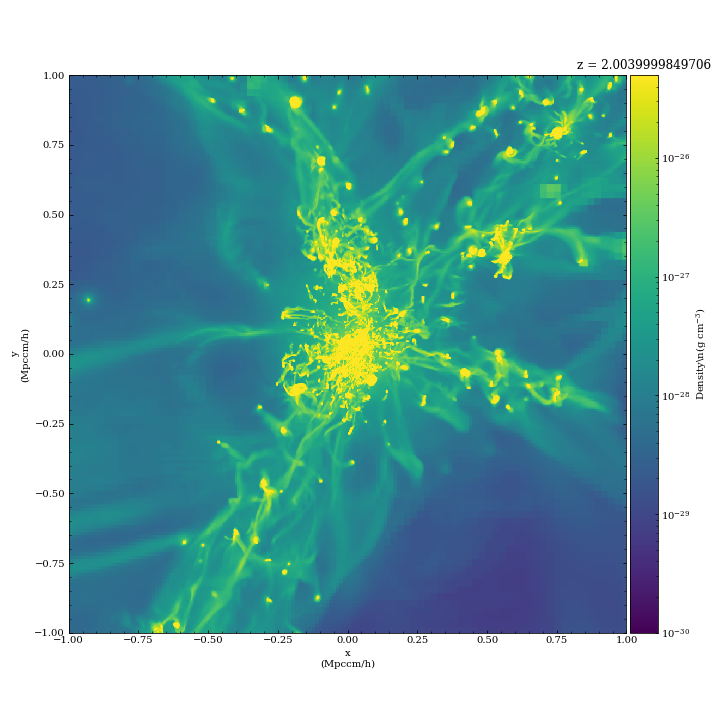

In [4]:
%autoreload
from blk import ProjectionPlotTask

plot = ProjectionPlotTask(dependencies=[proj])
plot.UI()

Now that the projection has been done, there's no need to re-run it when making changes to the plot. As long as you set the dependency to the projection task, new plot tasks will happily use the same data. Lets see this in action here:

Text(value='/mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run/RD0111/RD0111', description='Enzo Dataset…

Text(value='', description='Image filename:', layout=Layout(width='initial'), style=DescriptionStyle(descripti…

Text(value='viridis', description='Colormap:', layout=Layout(width='initial'), style=DescriptionStyle(descript…

Button(description='Save and Run', icon='play', style=ButtonStyle(), tooltip='Saves settings and runs the Task…

projectionPlot
Running: projectionPlot
Saving to file: red_density.png


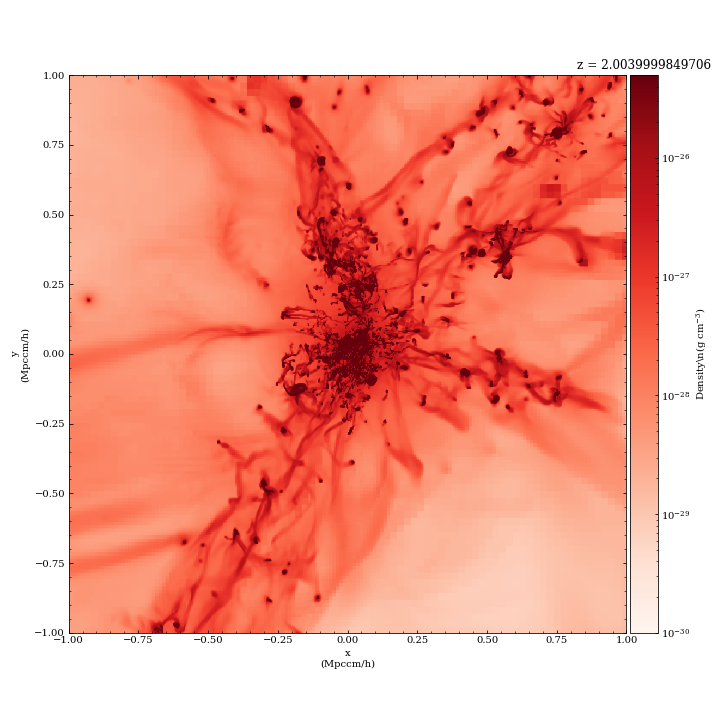

In [5]:
%autoreload
new_plot = ProjectionPlotTask(dependencies=[proj])
new_plot.UI()

In [14]:
%autoreload

density = ProjectionTask(name="density", cache=my_cache)
density.UI()

Text(value='/mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run', description='Enzo data directory:', lay…

Dropdown(description='Enzo dataset:', index=111, options=('RD0000/RD0000', 'RD0001/RD0001', 'RD0002/RD0002', '…

Dropdown(description='Projection field: ', options=('density', 'temperature', 'metallicity', 'grid_level', 'tc…

BoundedFloatText(value=0.08, description='Box Length:', max=1.0, step=0.001)

Dropdown(description='Shape of region: ', index=1, options=('sphere', 'cube'), value='cube')

GridspecLayout(children=(BoundedFloatText(value=0.486, description='x:', layout=Layout(grid_area='widget001'),…

Button(description='Save and Run', icon='play', style=ButtonStyle(), tooltip='Saves settings and runs the Task…

density b4a8b01cf834a40063160097b44b6d26


array([[4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       [4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       [4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       ...,
       [2.29214970e-29, 2.29214970e-29, 2.29214970e-29, ...,
        3.97045446e-28, 3.22624392e-28, 2.61694504e-28],
       [2.29214970e-29, 2.29214970e-29, 2.29214970e-29, ...,
        3.97666044e-28, 3.23293301e-28, 2.62325879e-28],
       [2.28796803e-29, 2.28796803e-29, 2.28796803e-29, ...,
        3.88744531e-28, 3.16654881e-28, 2.57460021e-28]])

In [15]:
%autoreload

temperature = ProjectionTask(name="temperature", cache=my_cache)
temperature.UI()

Text(value='/mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run', description='Enzo data directory:', lay…

Dropdown(description='Enzo dataset:', index=111, options=('RD0000/RD0000', 'RD0001/RD0001', 'RD0002/RD0002', '…

Dropdown(description='Projection field: ', options=('density', 'temperature', 'metallicity', 'grid_level', 'tc…

BoundedFloatText(value=0.08, description='Box Length:', max=1.0, step=0.001)

Dropdown(description='Shape of region: ', index=1, options=('sphere', 'cube'), value='cube')

GridspecLayout(children=(BoundedFloatText(value=0.486, description='x:', layout=Layout(grid_area='widget001'),…

Button(description='Save and Run', icon='play', style=ButtonStyle(), tooltip='Saves settings and runs the Task…

temperature b4a8b01cf834a40063160097b44b6d26


array([[4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       [4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       [4.11224872e-29, 4.11224872e-29, 4.11224872e-29, ...,
        1.40090706e-29, 1.40090706e-29, 1.40090706e-29],
       ...,
       [2.29214970e-29, 2.29214970e-29, 2.29214970e-29, ...,
        3.97045446e-28, 3.22624392e-28, 2.61694504e-28],
       [2.29214970e-29, 2.29214970e-29, 2.29214970e-29, ...,
        3.97666044e-28, 3.23293301e-28, 2.62325879e-28],
       [2.28796803e-29, 2.28796803e-29, 2.28796803e-29, ...,
        3.88744531e-28, 3.16654881e-28, 2.57460021e-28]])

temperature e12e39311c1bab61e1be24a236075f2f


array([[620341.93438429, 620341.93438473, 620341.93438429, ...,
         10755.06180229,  10755.06180228,  10755.06180229],
       [620341.93438473, 620341.93438517, 620341.93438473, ...,
         10755.0618023 ,  10755.06180229,  10755.0618023 ],
       [620341.93438429, 620341.93438473, 620341.93438429, ...,
         10755.06180229,  10755.06180228,  10755.06180229],
       ...,
       [ 16820.73875623,  16820.73875624,  16820.73875623, ...,
        283494.76915416, 298900.92895285, 311629.00379219],
       [ 16820.73875621,  16820.73875622,  16820.73875621, ...,
        283285.22243899, 298602.43296527, 311363.05797957],
       [ 16794.4109159 ,  16794.41091592,  16794.4109159 , ...,
        282654.75997389, 297582.69588001, 310087.65360079]])

Text(value='/mnt/gs21/scratch/llorente/halo_4954_lowres/fiducial_run/RD0111/RD0111', description='Enzo Dataset…

Text(value='', description='Image filename:', layout=Layout(width='initial'), style=DescriptionStyle(descripti…

Button(description='Save and Run', icon='play', style=ButtonStyle(), tooltip='Saves settings and runs the Task…

TwoPanelProjectionPlot
Running: TwoPanelProjectionPlot
Saving to file: twop.png


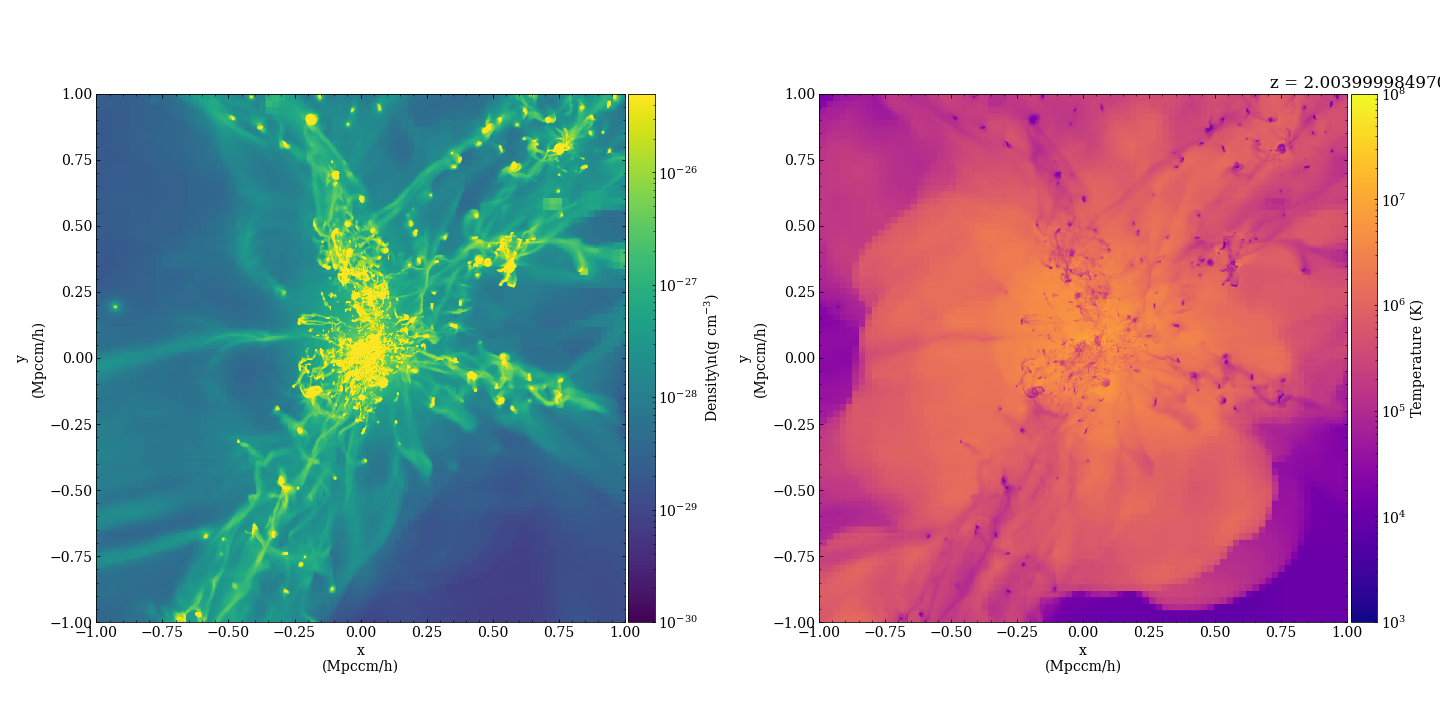

In [27]:
%autoreload
from blk import TwoPanelProjectionTask

twop = TwoPanelProjectionTask(
    dependencies=[density, temperature]
)
twop.arguments["data_keys"] = ["density", "temperature"]
twop.arguments["fields"] = ["density", "temperature"]
twop.UI()